### Data cleaning and exploration

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import os

In [163]:
dataset = '../Data/Climate_Dataset.xlsx'
df_climate =  pd.read_excel(dataset)

In [164]:
df_climate.head()

,code,name,1901-07,1902-07,1903-07,1904-07,1905-07,1906-07,1907-07,1908-07,...,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2020-07,2021-07,2022-07,2023-07
0,ABW,Aruba (Neth.),28.22,27.79,27.89,27.62,27.68,27.58,27.56,27.46,...,29.46,29.68,29.71,29.27,28.95,29.33,29.34,29.04,28.81,29.39
1,AFG,Afghanistan,12.79,13.00,11.82,12.14,12.03,12.52,11.90,12.22,...,13.20,13.78,14.26,13.88,14.18,13.80,13.19,14.34,14.51,14.67
2,AGO,Angola,21.32,21.36,21.37,21.28,21.32,21.20,21.22,21.29,...,21.56,21.69,21.94,21.84,21.66,21.76,21.72,21.73,21.62,21.51
3,AIA,Anguilla (U.K.),27.19,26.77,26.81,26.34,26.69,26.45,26.11,26.25,...,27.97,28.22,28.15,27.96,27.70,28.08,28.04,27.96,27.73,28.35
4,ALB,Albania,11.36,11.14,11.64,11.56,11.41,11.45,11.21,11.06,...,13.12,13.00,12.90,12.81,13.49,13.47,13.17,12.84,13.44,13.86


In [165]:
df_climate.shape

(237, 125)

In [166]:
df_climate.dtypes

code        object
name        object
1901-07    float64
1902-07    float64
1903-07    float64
            ...   
2019-07    float64
2020-07    float64
2021-07    float64
2022-07    float64
2023-07    float64
Length: 125, dtype: object

##### Checking for null/missing values

In [167]:
df_climate.isna().sum()

code       0
name       0
1901-07    2
1902-07    2
1903-07    2
          ..
2019-07    2
2020-07    2
2021-07    2
2022-07    2
2023-07    2
Length: 125, dtype: int64

##### **Reshaping the data**

In [168]:
df_climate.drop(columns=["code"], inplace=True)

In [169]:
df_climate.rename(columns={"name": "Country"}, inplace=True)

In [170]:
df_climate.head()

,Country,1901-07,1902-07,1903-07,1904-07,1905-07,1906-07,1907-07,1908-07,1909-07,...,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2020-07,2021-07,2022-07,2023-07
0,Aruba (Neth.),28.22,27.79,27.89,27.62,27.68,27.58,27.56,27.46,27.52,...,29.46,29.68,29.71,29.27,28.95,29.33,29.34,29.04,28.81,29.39
1,Afghanistan,12.79,13.00,11.82,12.14,12.03,12.52,11.90,12.22,12.73,...,13.20,13.78,14.26,13.88,14.18,13.80,13.19,14.34,14.51,14.67
2,Angola,21.32,21.36,21.37,21.28,21.32,21.20,21.22,21.29,21.31,...,21.56,21.69,21.94,21.84,21.66,21.76,21.72,21.73,21.62,21.51
3,Anguilla (U.K.),27.19,26.77,26.81,26.34,26.69,26.45,26.11,26.25,26.19,...,27.97,28.22,28.15,27.96,27.70,28.08,28.04,27.96,27.73,28.35
4,Albania,11.36,11.14,11.64,11.56,11.41,11.45,11.21,11.06,11.31,...,13.12,13.00,12.90,12.81,13.49,13.47,13.17,12.84,13.44,13.86


In [171]:
region_mapping = {
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", "Central African Republic",
        "Chad", "Comoros", "Côte d'Ivoire", "Democratic Republic of Congo", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea",
        "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Libya",
        "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda",
        "São Tomé and Príncipe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan",
        "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
    ],

    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei Darussalam", "Cambodia", "China",
        "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait",
        "Kyrgyz Republic", "Lao People's Democratic Republic", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal",
        "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea",
        "Sri Lanka", "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates",
        "Uzbekistan", "Vietnam", "Republic of Yemen"
    ],

    "Europe": [
        "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Czech Republic",
        "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo",
        "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands",
        "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovak Republic",
        "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom", "Vatican City"
    ],

    "Americas": [
        "Antigua and Barbuda", "Argentina", "Bahamas", "Barbados", "Belize", "Bolivia", "Brazil", "Canada", "Chile", "Colombia",
        "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "Ecuador", "El Salvador", "Grenada", "Guatemala", "Guyana",
        "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Paraguay", "Peru", "Saint Kitts and Nevis", "Saint Lucia",
        "Saint Vincent and the Grenadines", "Suriname", "Trinidad and Tobago", "United States of America", "Uruguay", "Venezuela"
    ],

    "Oceania": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", "Palau", "Papua New Guinea",
        "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"
    ],

    "Arctic": [
        "Greenland (Den.)", "Svalbard and Jan Mayen (Nor.)", "French Southern and Antarctic Lands (Fr.)", "Heard Island and McDonald Islands (Aus.)"
    ]
}


In [172]:
def map_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region
    return "Other"

df_climate["Region"] = df_climate["Country"].apply(map_region)

In [173]:
df_climate.head()

,Country,1901-07,1902-07,1903-07,1904-07,1905-07,1906-07,1907-07,1908-07,1909-07,...,2015-07,2016-07,2017-07,2018-07,2019-07,2020-07,2021-07,2022-07,2023-07,Region
0,Aruba (Neth.),28.22,27.79,27.89,27.62,27.68,27.58,27.56,27.46,27.52,...,29.68,29.71,29.27,28.95,29.33,29.34,29.04,28.81,29.39,Other
1,Afghanistan,12.79,13.00,11.82,12.14,12.03,12.52,11.90,12.22,12.73,...,13.78,14.26,13.88,14.18,13.80,13.19,14.34,14.51,14.67,Asia
2,Angola,21.32,21.36,21.37,21.28,21.32,21.20,21.22,21.29,21.31,...,21.69,21.94,21.84,21.66,21.76,21.72,21.73,21.62,21.51,Africa
3,Anguilla (U.K.),27.19,26.77,26.81,26.34,26.69,26.45,26.11,26.25,26.19,...,28.22,28.15,27.96,27.70,28.08,28.04,27.96,27.73,28.35,Other
4,Albania,11.36,11.14,11.64,11.56,11.41,11.45,11.21,11.06,11.31,...,13.00,12.90,12.81,13.49,13.47,13.17,12.84,13.44,13.86,Europe


##### Figuring out if i should drop countries that has "Other" as a region

In [174]:
df_climate["Region"].value_counts().get("Other", 0)

51

In [175]:
print(df_climate["Region"].value_counts())

Region
Other       51
Africa      50
Europe      44
Asia        42
Americas    33
Oceania     13
Arctic       4
Name: count, dtype: int64


##### Since I can see that its roughly 20-25% of my dataset, I will instead manually assing each country that's missing a region

In [176]:
others = df_climate[df_climate["Region"] == "Other"]["Country"].unique()
print(others)

['Aruba (Neth.)' 'Anguilla (U.K.)' 'American Samoa (U.S.)'
 'Bonaire, Sint Eustatius and Saba' 'The Bahamas' 'Saint-Barthélemy (Fr.)'
 'Bermuda (U.K.)' 'Bouvet Island (Nor.)' 'Cocos (Keeling) Islands (Aus.)'
 'Congo' 'Cook Islands (N.Z.)' 'Cabo Verde' 'Curaçao (Neth.)'
 'Christmas Island (Aus.)' 'Cayman Islands (U.K.)'
 'Arab Republic of Egypt' 'Faroe Islands (Den.)'
 'Federated States of Micronesia' 'Guernsey (U.K.)' 'Gibraltar (U.K.)'
 'The Gambia' 'Guam (U.S.)' 'Isle of Man (U.K.)'
 'British Indian Ocean Territory (U.K.)' 'Islamic Republic of Iran'
 'Jersey (U.K.)' 'Republic of Korea' 'Saint-Martin (Fr.)'
 'Northern Mariana Islands (U.S.)' 'Montserrat (U.K.)'
 'New Caledonia (Fr.)' 'Norfolk Island (Aus.)' 'Niue (N.Z.)'
 'Pitcairn Islands (U.K.)' 'Puerto Rico (U.S.)' 'D. P. R. of Korea'
 'West Bank and Gaza' 'French Polynesia (Fr.)' 'Russian Federation'
 'Saint Helena, Ascension and Tristan da Cunha (U.K.)'
 'Saint-Pierre-et-Miquelon (Fr.)' 'Sint Maarten (Neth.)'
 'Syrian Arab Republ

In [177]:
# Figuring out which region the different countries need, and updating the existing region map
region_mapping.update({
    'Aruba (Neth.)': 'Americas',
    'Anguilla (U.K.)': 'Americas',
    'American Samoa (U.S.)': 'Oceania',
    'Bonaire, Sint Eustatius and Saba': 'Americas',
    'The Bahamas': 'Americas',
    'Saint-Barthélemy (Fr.)': 'Americas',
    'Bermuda (U.K.)': 'Americas',
    'Bouvet Island (Nor.)': 'Antarctic',
    'Cocos (Keeling) Islands (Aus.)': 'Oceania',
    'Congo': 'Africa',
    'Cook Islands (N.Z.)': 'Oceania',
    'Cabo Verde': 'Africa',
    'Curaçao (Neth.)': 'Americas',
    'Christmas Island (Aus.)': 'Oceania',
    'Cayman Islands (U.K.)': 'Americas',
    'Arab Republic of Egypt': 'Africa',
    'Faroe Islands (Den.)': 'Europe',
    'Federated States of Micronesia': 'Oceania',
    'Guernsey (U.K.)': 'Europe',
    'Gibraltar (U.K.)': 'Europe',
    'The Gambia': 'Africa',
    'Guam (U.S.)': 'Oceania',
    'Isle of Man (U.K.)': 'Europe',
    'British Indian Ocean Territory (U.K.)': 'Asia',
    'Islamic Republic of Iran': 'Asia',
    'Jersey (U.K.)': 'Europe',
    'Republic of Korea': 'Asia',
    'Saint-Martin (Fr.)': 'Americas',
    'Northern Mariana Islands (U.S.)': 'Oceania',
    'Montserrat (U.K.)': 'Americas',
    'New Caledonia (Fr.)': 'Oceania',
    'Norfolk Island (Aus.)': 'Oceania',
    'Niue (N.Z.)': 'Oceania',
    'Pitcairn Islands (U.K.)': 'Oceania',
    'Puerto Rico (U.S.)': 'Americas',
    'D. P. R. of Korea': 'Asia',
    'West Bank and Gaza': 'Asia',
    'French Polynesia (Fr.)': 'Oceania',
    'Russian Federation': 'Asia',
    'Saint Helena, Ascension and Tristan da Cunha (U.K.)': 'Africa',
    'Saint-Pierre-et-Miquelon (Fr.)': 'Americas',
    'Sint Maarten (Neth.)': 'Americas',
    'Syrian Arab Republic': 'Asia',
    'Turks and Caicos Islands (U.K.)': 'Americas',
    'Tokelau (N.Z.)': 'Oceania',
    'Türkiye': 'Asia',
    'U.S. Minor Outlying Islands': 'Oceania',
    'R. B. de Venezuela': 'Americas',
    'British Virgin Islands (U.K.)': 'Americas',
    'United States Virgin Islands (U.S.)': 'Americas',
    'Wallis and Futuna (Fr.)': 'Oceania'
})

In [178]:
df_climate.loc[df_climate["Region"] == "Other", "Region"] = df_climate["Country"].map(region_mapping)


In [179]:
df_climate.head()

,Country,1901-07,1902-07,1903-07,1904-07,1905-07,1906-07,1907-07,1908-07,1909-07,...,2015-07,2016-07,2017-07,2018-07,2019-07,2020-07,2021-07,2022-07,2023-07,Region
0,Aruba (Neth.),28.22,27.79,27.89,27.62,27.68,27.58,27.56,27.46,27.52,...,29.68,29.71,29.27,28.95,29.33,29.34,29.04,28.81,29.39,Americas
1,Afghanistan,12.79,13.00,11.82,12.14,12.03,12.52,11.90,12.22,12.73,...,13.78,14.26,13.88,14.18,13.80,13.19,14.34,14.51,14.67,Asia
2,Angola,21.32,21.36,21.37,21.28,21.32,21.20,21.22,21.29,21.31,...,21.69,21.94,21.84,21.66,21.76,21.72,21.73,21.62,21.51,Africa
3,Anguilla (U.K.),27.19,26.77,26.81,26.34,26.69,26.45,26.11,26.25,26.19,...,28.22,28.15,27.96,27.70,28.08,28.04,27.96,27.73,28.35,Americas
4,Albania,11.36,11.14,11.64,11.56,11.41,11.45,11.21,11.06,11.31,...,13.00,12.90,12.81,13.49,13.47,13.17,12.84,13.44,13.86,Europe


In [180]:
df_region_temp = df_climate.groupby("Region").mean(numeric_only=True)

df_region_temp.reset_index(inplace=True)

In [182]:
df_region_temp = df_region_temp[df_region_temp["Region"] != "Antarctic"]


In [184]:
df_region_temp.head(7)

,Region,1901-07,1902-07,1903-07,1904-07,1905-07,1906-07,1907-07,1908-07,1909-07,...,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2020-07,2021-07,2022-07,2023-07
0,Africa,23.735091,23.814364,23.766182,23.645636,23.730000,23.685091,23.515636,23.740000,23.661091,...,24.469455,24.623818,24.772182,24.602182,24.493455,24.557636,24.563455,24.652909,24.441091,24.743091
1,Americas,22.947143,22.838776,22.755714,22.564694,22.744898,22.662857,22.521020,22.620204,22.577143,...,23.738571,24.016122,23.938980,23.830204,23.532041,23.839796,23.917143,23.730204,23.547551,24.201837
3,Arctic,-5.772500,-5.912500,-5.885000,-5.985000,-5.820000,-6.005000,-6.035000,-5.757500,-5.857500,...,-4.622500,-4.357500,-3.395000,-4.092500,-4.287500,-4.347500,-4.390000,-4.077500,-4.205000,-3.872500
4,Asia,18.091200,17.942800,17.572200,17.622000,17.725600,17.888200,17.516400,17.637200,18.029400,...,18.941000,19.176000,19.322800,19.115000,19.295600,19.308800,19.176000,19.434800,19.270000,19.665600
5,Europe,8.688571,8.069388,8.936939,8.793673,8.725918,8.904898,8.416735,8.422245,8.336735,...,10.855102,10.688571,10.375918,10.394898,10.874286,10.915918,11.010204,10.161633,11.068980,11.227551
6,Oceania,24.814643,24.764643,24.808571,24.685714,24.727143,24.799643,24.775000,24.747143,24.786429,...,25.157857,25.155357,25.416786,25.346071,25.255000,25.304643,25.373571,25.274286,25.239286,25.269643


#### 1. Plot **Global Temperature Trend Over Time**

In [186]:
year_cols = [col for col in df_climate.columns if col.endswith("-07")]

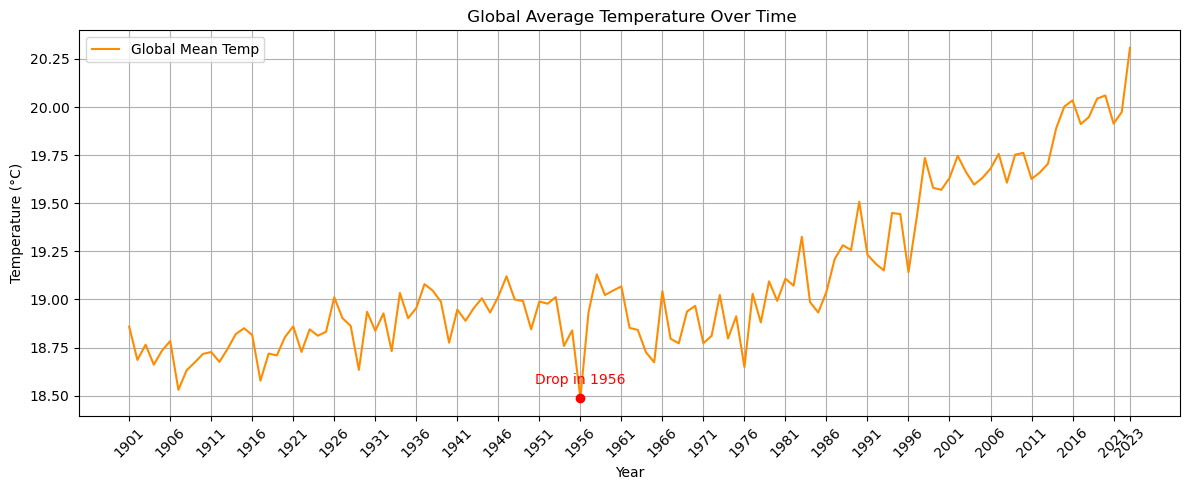

In [187]:
# Get year columns and global means
global_means = df_climate[year_cols].mean()
years = [int(col.split("-")[0]) for col in year_cols]
temps = global_means.values

# Calculate xticks: every 5th year + last year
xtick_years = [year for i, year in enumerate(years) if i % 5 == 0]
if years[-1] not in xtick_years:
    xtick_years.append(years[-1])

# Plot
plt.figure(figsize=(12, 5))
plt.plot(years, temps, label="Global Mean Temp", color="darkorange")  # ← No dots!
# Highlight 1956
if 1956 in years:
    idx_1956 = years.index(1956)
    temp_1956 = temps[idx_1956]
    plt.scatter(1956, temp_1956, color='red', zorder=5)
    plt.annotate("Drop in 1956", (1956, temp_1956), textcoords="offset points", xytext=(0,10), ha='center', color='red')

plt.xticks(ticks=xtick_years, rotation=45)

plt.title(" Global Average Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



##### The plot shows the global average temperature trend from 1901 to 2023, based on climate data across all countries. It clearly illustrates a consistent rise in global temperatures, especially after the 1980s, supporting evidence of global warming.

##### One particularly interesting point is the significant drop in 1956, which stands out from the otherwise rising pattern. This anomaly was highlighted instead of the high points, as it provides an opportunity to ask critical questions: Was this due to data inconsistency, a global climate event, or other external factors such as volcanic activity or post-war impacts?

##### Focusing on a dip rather than a peak allows for deeper analysis and avoids stating the obvious — that temperatures are rising. It's more analytical to investigate deviations from expected behavior than to highlight a well-known trend.

#### 2. **Lineplot of Average July Temperatures by Region – Past 20 Yearss** 

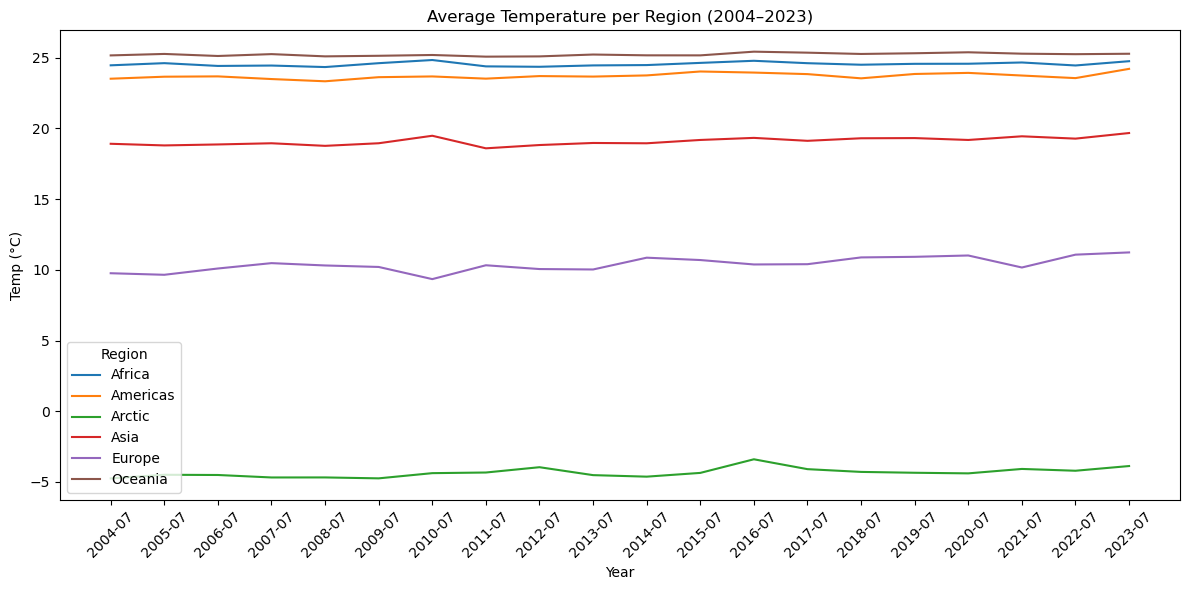

In [195]:
recent_cols = [col for col in df_region_temp.columns if col.endswith("-07")][-20:]

# Transpose for easier plotting
df_plot = df_region_temp[recent_cols].T
df_plot.index.name = "Year"
df_plot.reset_index(inplace=True)

# Plot line trends per region
plt.figure(figsize=(12, 6))
for col in df_plot.columns[1:]:
    plt.plot(df_plot["Year"], df_plot[col], label=col)

plt.xticks(rotation=45)
plt.title("Average Temperature per Region (2004–2023)")
plt.xlabel("Year")
plt.ylabel("Temp (°C)")
plt.legend(title="Region")
plt.tight_layout()
plt.show()



##### Despite the small temperature changes shown, this plot highlights long-term regional trends. Africa and Oceania remain the hottest, while the Arctic — though coldest — shows a slight rise. This supports the hypothesis that even subtle climate shifts, especially in vulnerable regions, can contribute to extinction risk when combined with biological stress factors like low reproduction or dietary sensitivity.

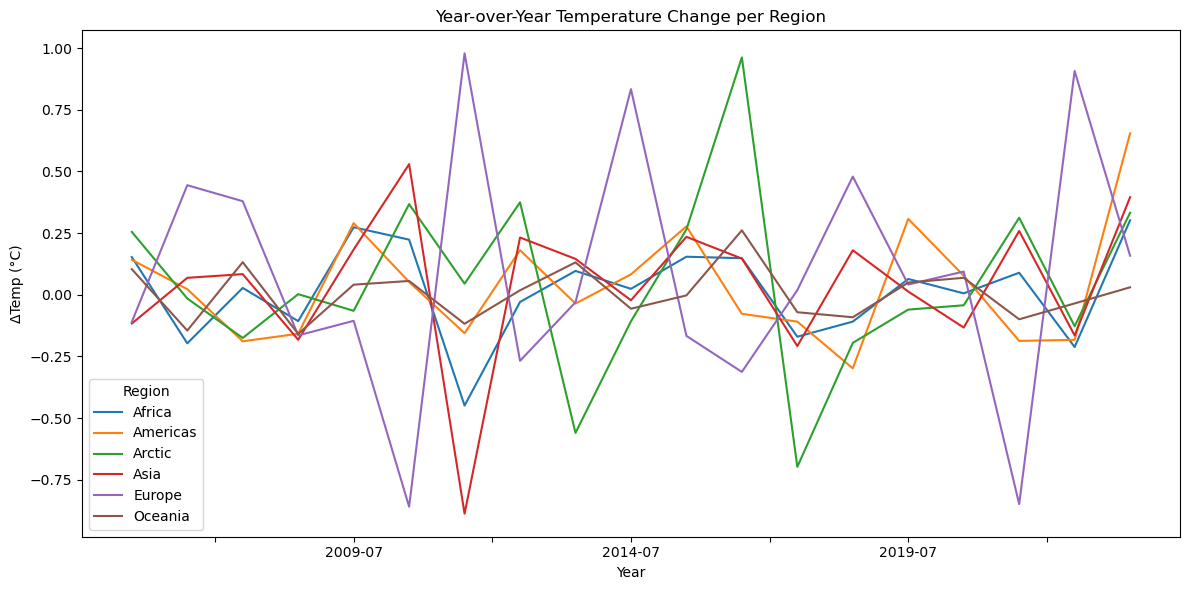

In [196]:
df_diff = df_region_temp[recent_cols].diff(axis=1)
df_diff.T.plot(figsize=(12, 6), title="Year-over-Year Temperature Change per Region")
plt.xlabel("Year")
plt.ylabel("ΔTemp (°C)")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

##### This year-over-year temperature change plot highlights regional climate volatility, with sharp fluctuations especially in Europe and the Arctic. While the data appears chaotic, it reflects growing instability in global temperature patterns. Notably, most regions show a rising trend in temperature change toward the end of the period, reinforcing the hypothesis that increasing and erratic climate shifts contribute to extinction risk — particularly in regions already under environmental stress.

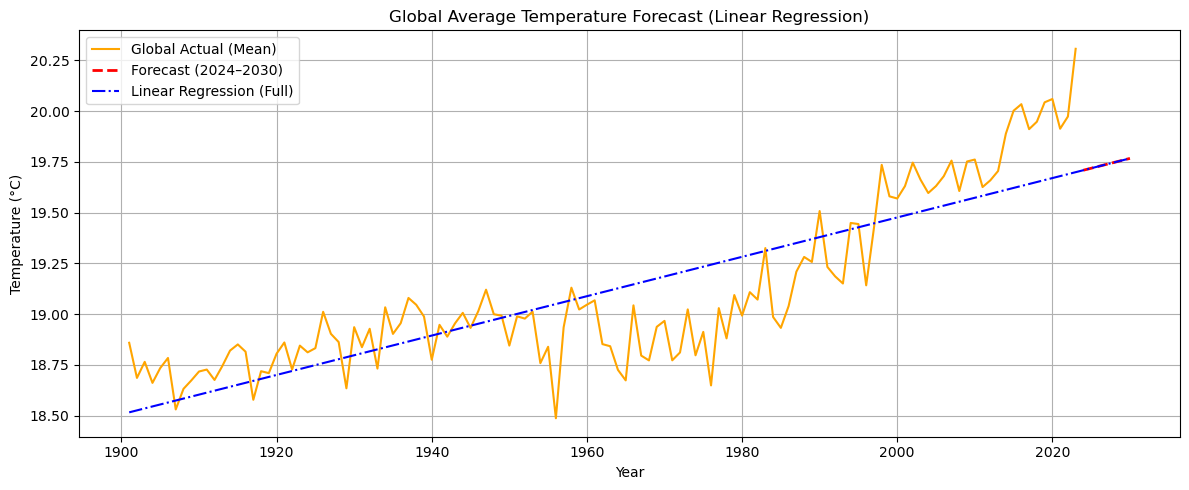

In [197]:
# Get temperature columns by year
year_cols = [col for col in df_climate.columns if col.endswith("-07")]

# Prepare X (years as ints) and y (global mean temp)
X_years = np.array([int(col.split("-")[0]) for col in year_cols]).reshape(-1, 1)
y_global = df_climate[year_cols].mean().values

# Train linear regression model
model = LinearRegression()
model.fit(X_years, y_global)

# Predict future years (2024–2030)
future_years = np.array(range(2024, 2031)).reshape(-1, 1)
future_preds = model.predict(future_years)

# Predict full regression line from 1901 to 2030
full_years = np.append(X_years.flatten(), future_years.flatten()).reshape(-1, 1)
full_preds = model.predict(full_years)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(X_years.flatten(), y_global, label="Global Actual (Mean)", color="orange")
plt.plot(future_years.flatten(), future_preds, label="Forecast (2024–2030)", linestyle="--", color="red", linewidth=2)
plt.plot(full_years.flatten(), full_preds, label="Linear Regression (Full)", linestyle="-.", color="blue")

plt.title("Global Average Temperature Forecast (Linear Regression)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##### This plot illustrates the global average temperature trend from 1901 to 2023, with a linear regression model fitted to the full timeline and a forecast extending to 2030.

##### The orange line shows observed global temperatures, which fluctuate due to natural variability. The blue regression line smooths out these short-term changes, revealing a clear long-term warming trend. The red dashed line forecasts this rise to continue in the near future.
##### While the model doesn't capture yearly spikes or drops, it highlights the consistent underlying increase in global temperatures over time.
##### This supports the inclusion of climate pressure in extinction risk modeling — reinforcing the hypothesis that rising temperatures, even when gradual, can intensify biological vulnerability across regions and ecosystems.

In [199]:
df_climate.to_csv("cleaned_climate_data.csv", index=False)